In [309]:
import glob
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np
import pandas as pd

In [310]:
tower_path = "tower_icons"

In [311]:
icons_named = glob.glob(tower_path+"/*.png")

In [312]:
icons_named

['tower_icons/icon_image_102.png',
 'tower_icons/icon_image_100.png',
 'tower_icons/icon_image_101.png']

In [313]:
icon = cv2.cvtColor(cv2.imread("tower_icons/icon_image_102.png",1),cv2.COLOR_BGR2RGB)

In [314]:
background = cv2.imread("tower_icons/icon_image_102.png",1)

In [315]:
def color_range_filter_with_params(img,min_hue,max_hue):
                      
    """Filter image by color(HSV).
    
    Args:
        img (np.ndarray): BGR image.
    
    Returns:
        np.ndarray: HSV filtered image.
    """                                      
    assert len(img.shape) > 2, 'Image should be in RGB format'
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
  
    image_mask= cv2.inRange(img,np.array(min_hue),np.array(max_hue))
    return image_mask

In [316]:
filtered_icon=color_range_filter_with_params(icon,(90,40,40),(110,250,250))

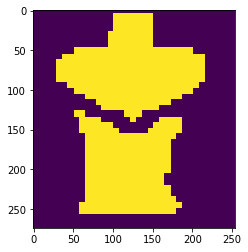

In [317]:
plt.imshow(filtered_icon)

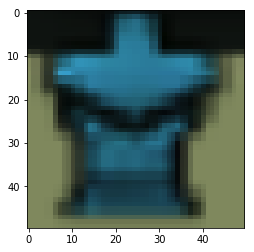

In [24]:
plt.imshow(cv2.resize(icon,(50,50)))

In [25]:
icon,background = [cv2.GaussianBlur(cv2.resize(image,(100,100)),(5,5),0) for image in (filtered_icon,background)]

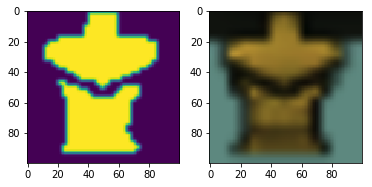

In [26]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(icon)
axarr[1].imshow(background)

In [ ]:
icon_reshaped = icon.reshape((icon.shape[0]*icon.shape[1],3))
clst = KMeans(n_clusters=3)

In [ ]:
icon_reshaped = icon.reshape((icon.shape[0]*icon.shape[1],3))
clst = KMeans(n_clusters=3)

In [20]:
import numpy as np
clustering = np.reshape(np.array(clst.labels_, dtype=np.uint8),
    (icon.shape[0], icon.shape[1]))

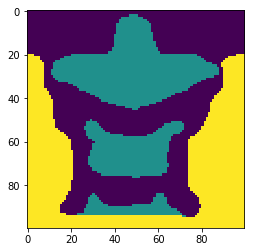

In [21]:
plt.imshow(clustering)

In [22]:
clustering

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [23]:
icon[(clustering==0) | (clustering==2)] = 0


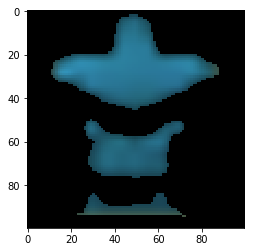

In [24]:
plt.imshow(icon)

In [55]:
def shift_image(image,x_shift,y_shift):
    non = lambda s: s if s<0 else None
    mom = lambda s: max(0,s)
        
    shifted_image = np.zeros_like(image)
    shifted_image[mom(y_shift):non(y_shift), mom(x_shift):non(x_shift)] = \
    image[mom(-y_shift):non(-y_shift), mom(-x_shift):non(-x_shift)]
    return shifted_image

In [64]:
centered_icon = shift_image(filtered_icon,1,0)

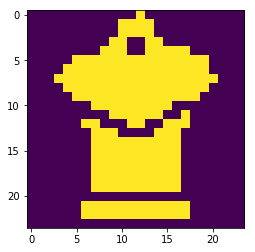

In [65]:
plt.imshow(centered_icon)

In [37]:
np.save("tower_mask.npy",centered_icon)

In [179]:
small_icon= cv2.cvtColor(cv2.resize(centered_icon,(22,22),cv2.INTER_LANCZOS4),cv2.COLOR_BGR2GRAY)
#small_icon = cv2.resize(centered_icon,(30,30))

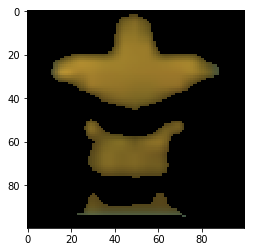

In [210]:
plt.imshow(icon)

In [180]:
minimap = cv2.resize(cv2.imread("minimap.png",0),(400,400))

In [181]:
minimap.shape

(400, 400)

In [141]:
w, h = small_icon.shape[0],small_icon.shape[1]

res = cv2.matchTemplate(minimap,small_icon,cv2.TM_SQDIFF_NORMED)
threshold = 0.6
loc = np.where( res <= threshold)


In [43]:
np.min(res)

0.44448128

In [44]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(minimap, pt, (pt[0] + w, pt[1] + h), (255,255,255), 2)

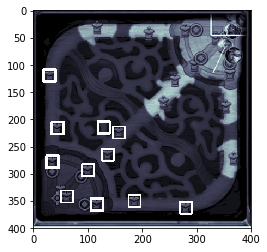

In [45]:
plt.imshow(minimap,cmap="bone")

In [57]:
cv2.imwrite("labeled_map.png",minimap)

True

In [928]:
equalized = cv2.equalizeHist(minimap)

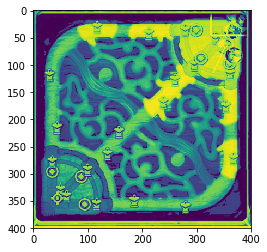

In [929]:
plt.imshow(equalized)

## Try using  some edge detection

In [249]:
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """
    pass

In [283]:
map_edge = cv2.Laplacian(minimap,cv2.CV_32F)
icon_edge_old = cv2.Laplacian(small_icon,cv2.CV_32F)

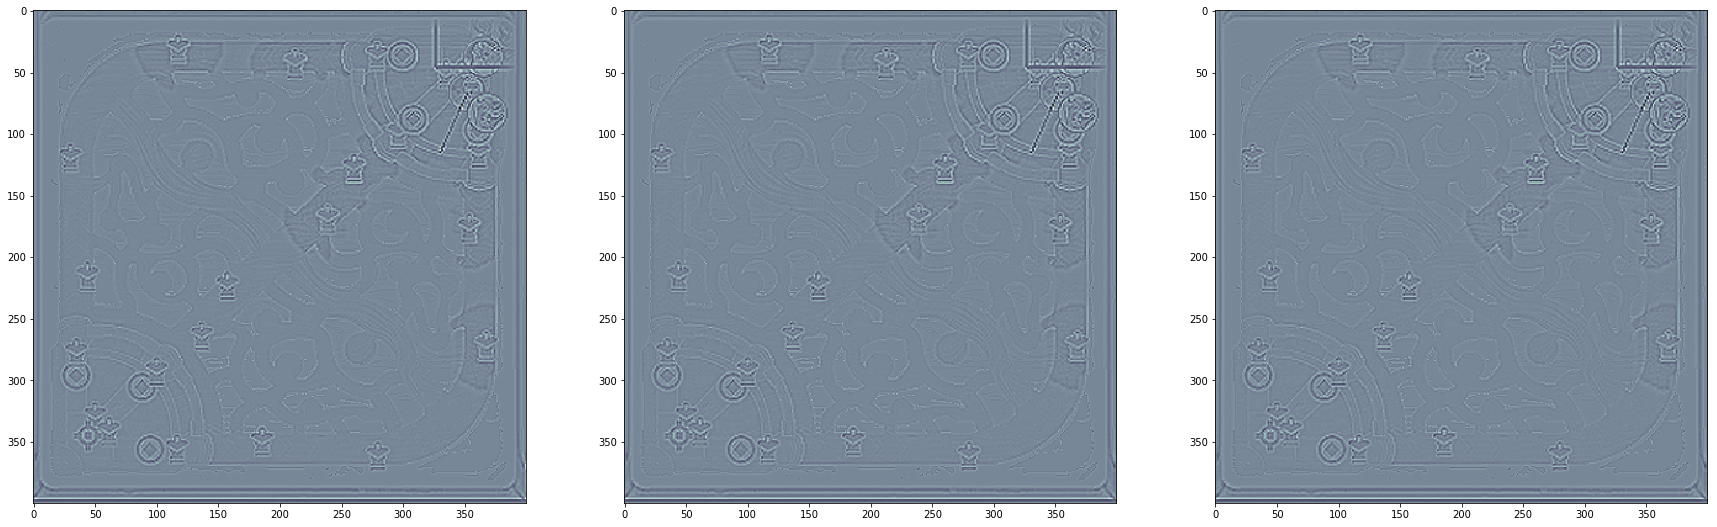

In [124]:
plt.subplots(figsize=(13,13))
plt.subplot(131)
plt.imshow(diff_edges[0],cmap="bone")
plt.subplot(132)
plt.imshow(diff_edges[1],cmap="bone")
plt.subplot(133)
plt.imshow(diff_edges[2],cmap="bone")

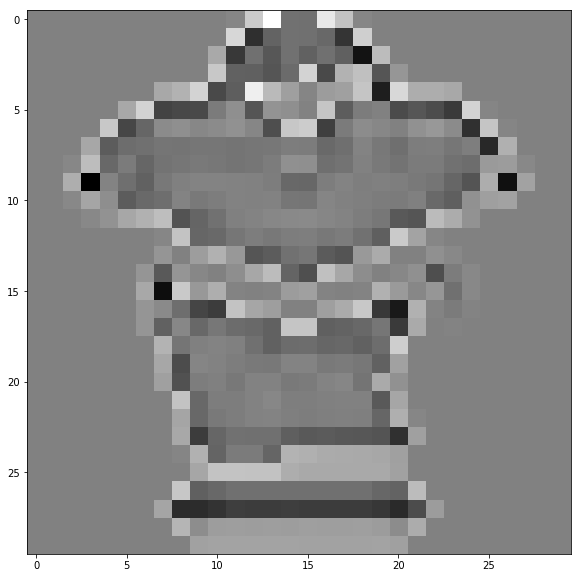

In [296]:
plt.subplots(figsize=(10,10))
plt.imshow(icon_edge)

In [1950]:
from itertools import product
combs = list(product(list(range(10,41)),list(range(10,41))))

In [1959]:
combs[353]

(21, 22)

In [1955]:
map_edge = cv2.Laplacian(cv2.resize(cv2.imread("minimap_with_destroyed.png",0),(400,400)),cv2.CV_32F)

In [1956]:
def calculate_res(dims):
    icon_edge = cv2.cvtColor(cv2.Laplacian(cv2.resize(centered_icon,dims,cv2.INTER_LANCZOS4),cv2.CV_32F),cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(map_edge,icon_edge,cv2.TM_CCOEFF_NORMED)
    return np.max(res)

In [1957]:
results = [calculate_res(dims) for dims in combs]

In [1958]:
np.argmax(results)

353

In [2125]:
map_edge = cv2.cvtColor(cv2.Laplacian(cv2.resize(cv2.imread("minimap_with_destroyed.png",1),(400,400)),cv2.CV_32F),cv2.COLOR_BGR2GRAY)
icon_edge = cv2.cvtColor(cv2.Laplacian(cv2.resize(centered_icon,(23, 24)),cv2.CV_32F),cv2.COLOR_BGR2GRAY)

w, h = icon_edge.shape[0],icon_edge.shape[1]

res = cv2.matchTemplate(map_edge,icon_edge,cv2.TM_CCOEFF_NORMED)
threshold = 0.28
loc = np.where(np.abs(res) >= threshold)

In [2126]:
np.max(res)

0.3823713

In [2127]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(map_edge, pt, (pt[0] + w, pt[1] + h), (255,255,255), 1)

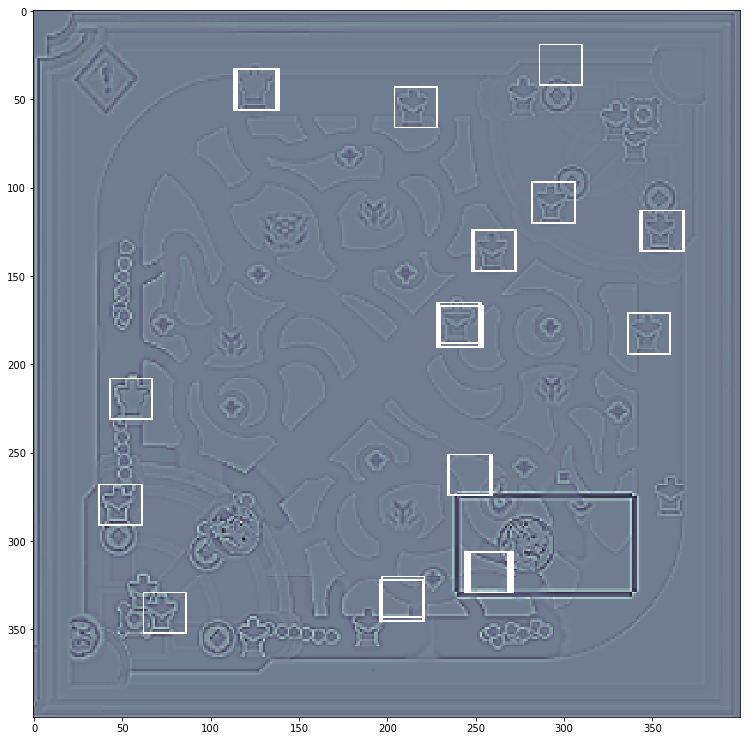

In [2128]:
plt.subplots(figsize=(13,13))
plt.imshow(map_edge,cmap="bone")

# How about Canny 

In [2005]:
map_not_resized = cv2.resize(cv2.GaussianBlur(cv2.imread("minimap_with_destroyed.png",1),(3,3),.1),(400,400))

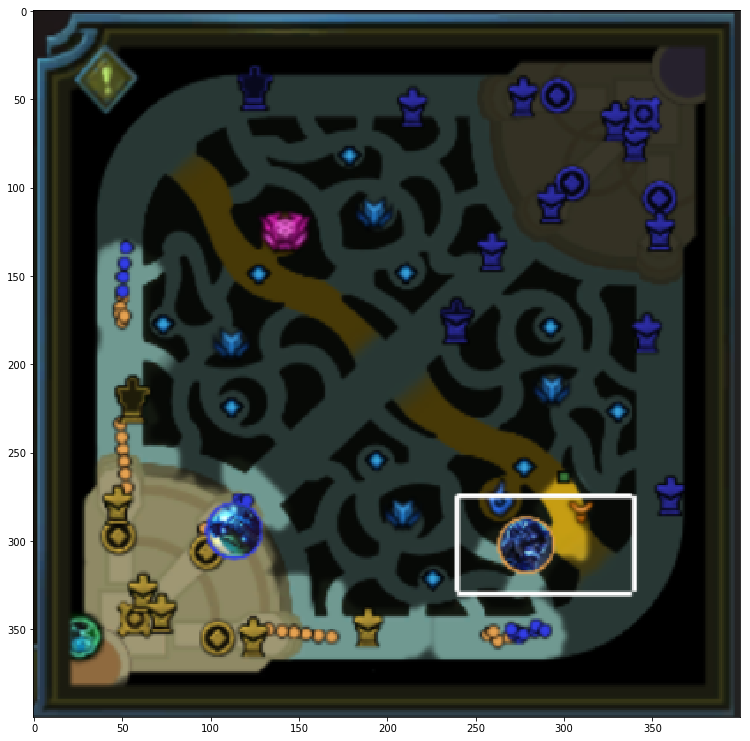

In [2006]:
plt.subplots(figsize=(13,13))
plt.imshow(map_not_resized)

In [1913]:
edges_crips = cv2.Canny(map_not_resized,50,150)

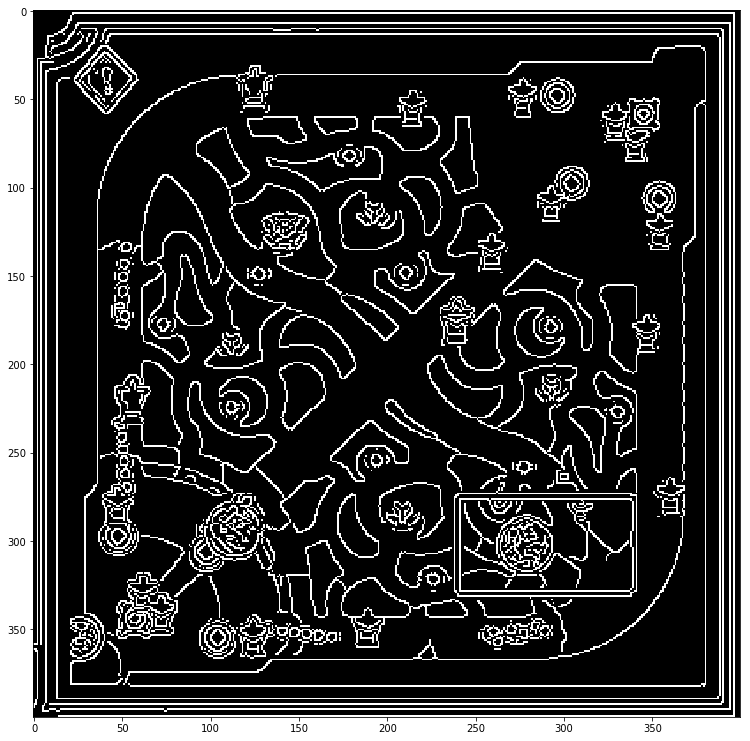

In [2009]:
plt.subplots(figsize=(13,13))
plt.imshow(edges_crips,cmap="bone")

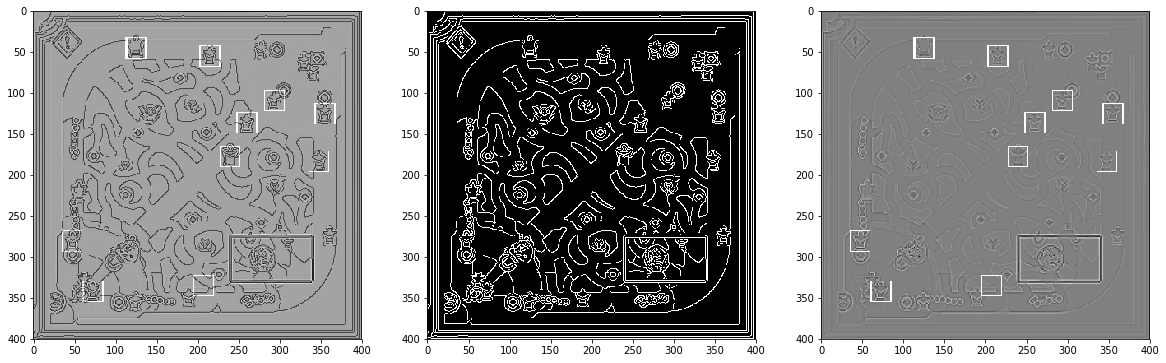

In [1822]:
plt.subplots(figsize=(20,20))
plt.subplot(131)
plt.imshow(map_edge - edges_crips)
plt.subplot(132)
plt.imshow(edges_crips)
plt.subplot(133)
plt.imshow(map_edge)

In [2010]:
icon_edge_canny  = cv2.Canny(small_icon,300,300)

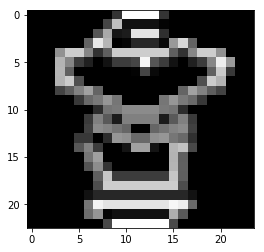

In [2129]:
plt.imshow(cv2.resize(icon_edge_canny,(24, 23),cv2.INTER_LANCZOS4))

In [2150]:
edges_crips = cv2.Canny(map_not_resized,300,300)
icon_edge_crisp = cv2.Canny(cv2.resize(centered_icon,(23, 24)),50,150)
w, h = icon_edge_crisp.shape[0],icon_edge_crisp.shape[1]

res = cv2.matchTemplate(edges_crips,icon_edge_crisp,cv2.TM_CCOEFF_NORMED)
threshold = 0.26
loc = np.where( np.abs(res) >= threshold)
np.max(res)

In [2152]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(edges_crips, pt, (pt[0] + w, pt[1] + h), (220,20,60), 2)

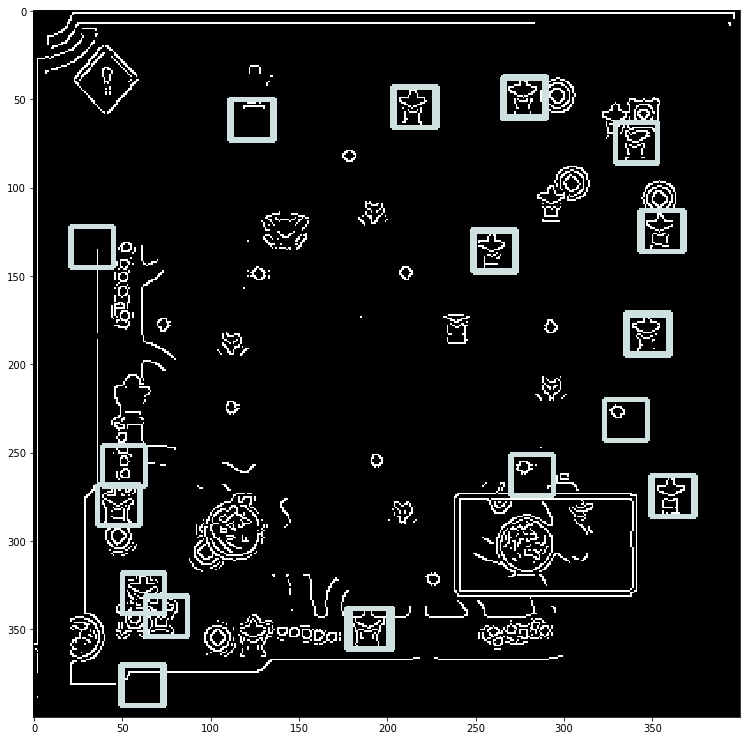

In [2153]:
plt.subplots(figsize=(13,13))
plt.imshow(edges_crips,cmap="bone")

# Pixel colour

In [318]:

minimap_colour = cv2.cvtColor(cv2.imread("minimap.png",1),cv2.COLOR_BGR2RGB)

In [319]:
def color_range_filter(img):
                      
    """Filter image by color(HSV).
    
    Args:
        img (np.ndarray): BGR image.
    
    Returns:
        np.ndarray: HSV filtered image.
    """                                      
    assert len(img.shape) > 2, 'Image should be in RGB format'
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    red_min_hsv,blue_min_hsv = ((0,0,50),(90,150,40))
    red_max_hsv,blue_max_hsv =((1,250,250),(100,200,200))
    
    image_mask_red = cv2.inRange(img, np.array(red_min_hsv), np.array(red_max_hsv))
    image_mask_blue = cv2.inRange(img,np.array(blue_min_hsv),np.array(blue_max_hsv))
    return image_mask_red+image_mask_blue

In [320]:
'''
red_min_hsv,blue_min_hsv = ((0,0,50),(90,150,50))
red_max_hsv,blue_max_hsv =((1,250,250),(100,200,200))
'''

'\nred_min_hsv,blue_min_hsv = ((0,0,50),(90,150,50))\nred_max_hsv,blue_max_hsv =((1,250,250),(100,200,200))\n'

In [321]:
filtered = color_range_filter(minimap_colour)

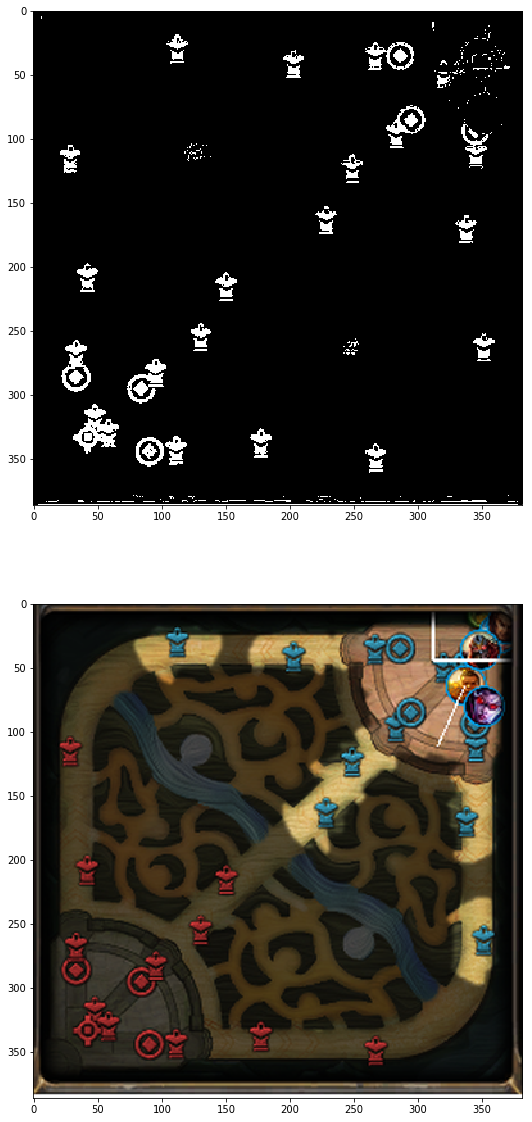

In [322]:
plt.subplots(figsize=(20,20))
plt.subplot(211)
plt.imshow(filtered,cmap="bone")
plt.subplot(212)
plt.imshow(minimap_colour,cmap="bone")

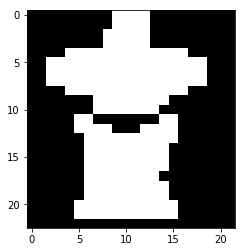

In [323]:
small_icon= cv2.resize(filtered_icon,(22,23),cv2.INTER_LANCZOS4)
small_icon[small_icon>20]=255
plt.imshow(small_icon,cmap="bone")

In [324]:
filtered = cv2.resize(color_range_filter(minimap_colour),(400,400))
w, h = small_icon.shape[0],small_icon.shape[1]
res = cv2.matchTemplate(filtered,small_icon,cv2.TM_CCOEFF_NORMED)
threshold = 0.45
loc = np.where( np.abs(res) >= threshold)
probs = np.abs(res[np.abs(res) >= threshold])
np.max(res)

0.8378436

In [325]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(filtered, pt, (pt[0] + w, pt[1] + h), (100,200,200), 1)

In [326]:
boxes = [(pt , (pt[0] + w, pt[1] + h)) for pt in zip(*loc[::-1])]

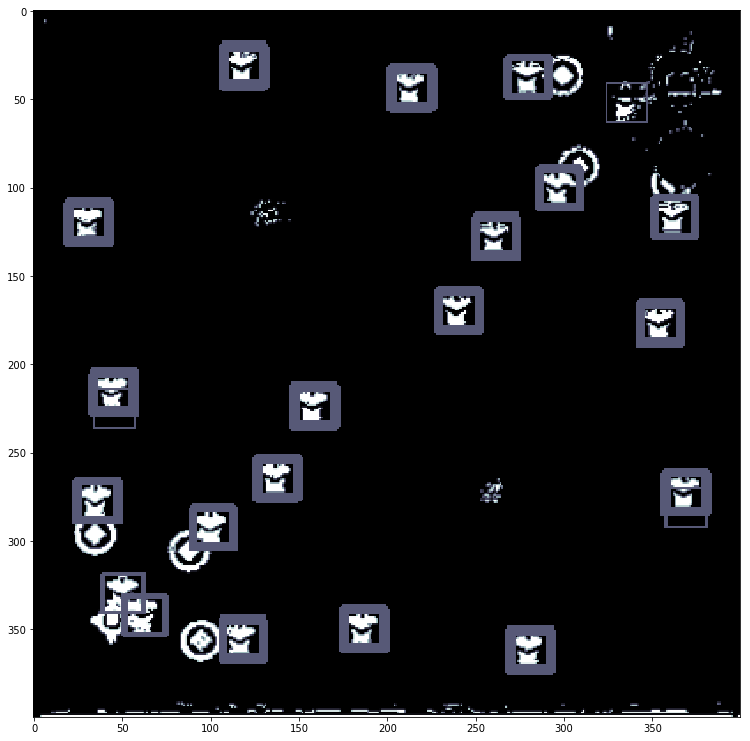

In [327]:
plt.subplots(figsize=(13,13))
plt.imshow(filtered,cmap="bone")

In [328]:
def plot_sections(minimap,ratio=0.7875):
    minimap_cp = minimap.copy()
    line_coords_base  = (int(minimap.shape[0]*ratio),int(minimap.shape[0]-minimap.shape[0]*ratio))
    line_coords = [((line_coords_base[0],0),(line_coords_base[0],minimap.shape[0])),\
                   ((line_coords_base[1],0),(line_coords_base[1],minimap.shape[0])),\
                   ((0,line_coords_base[0]),(minimap.shape[0],line_coords_base[0])),\
                   ((0,line_coords_base[1]),(minimap.shape[0],line_coords_base[1])),\
                   ((0,0),(minimap.shape[0],minimap.shape[0]))]
    
    
    for line_coord_pair in line_coords:
        minimap_cp = cv2.line(minimap_cp,*line_coord_pair,(255,0,0),1) 
        
    return minimap_cp,line_coords   

In [329]:
import numpy as np  
def non_max_suppression_fast(boxes,probabilities,overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes	
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(probabilities)
    

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int")

In [330]:
np_boxes = np.array(boxes).reshape(-1,4)

In [331]:
len(np_boxes)

425

In [332]:
new_boxes = non_max_suppression_fast(np_boxes,probs,.4)
filtered = cv2.resize(color_range_filter(minimap_colour),(400,400))

In [333]:
for pt in new_boxes:
    cv2.rectangle(filtered, (pt[0] , pt[1]), (pt[2] , pt[3]), (255,0,0), 1)

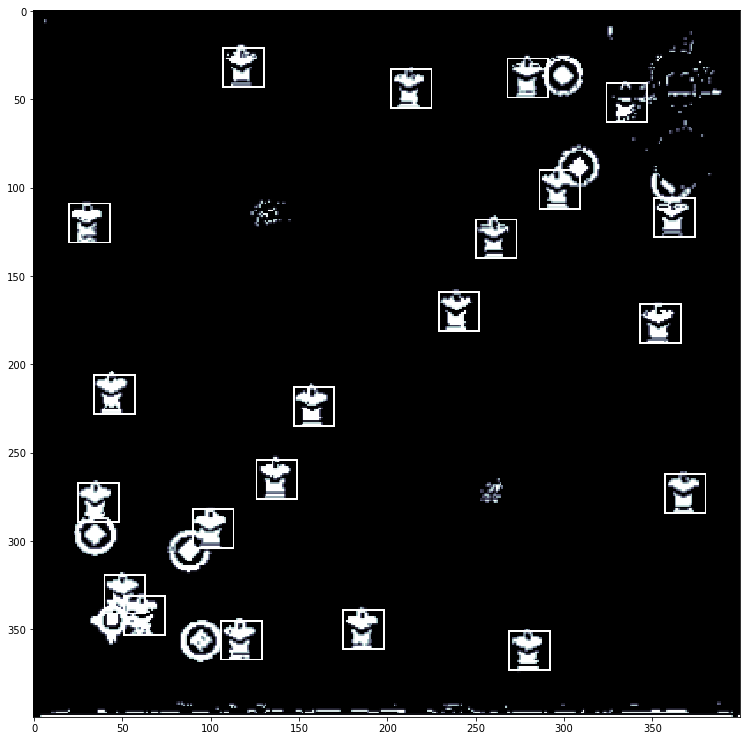

In [334]:
plt.subplots(figsize=(13,13))
plt.imshow(filtered,cmap="bone")

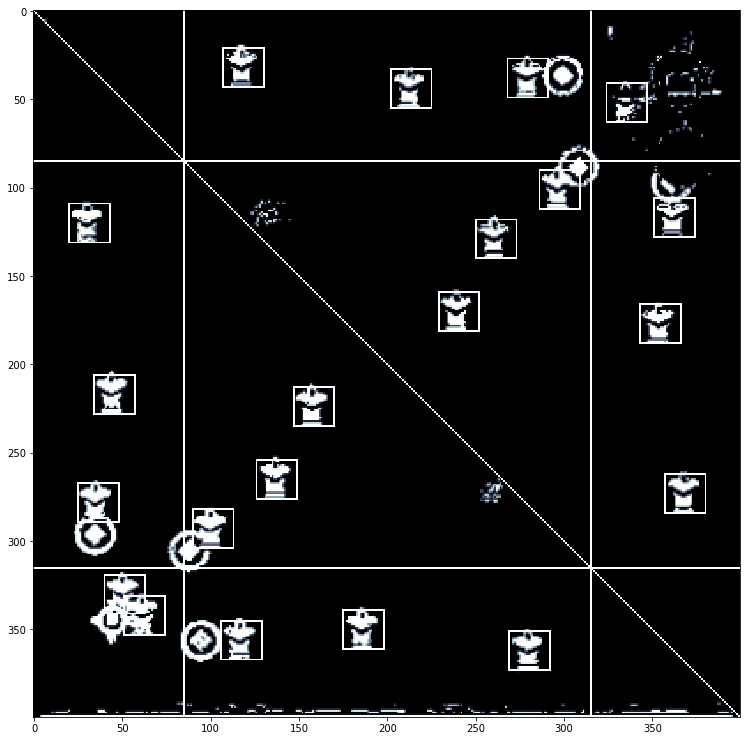

In [335]:
plt.subplots(figsize=(13,13))
with_sections, line_equations = plot_sections(filtered)
plt.imshow(with_sections,cmap="bone")

In [336]:
line_vectors = [calculate_line_vector(coords) for coords in line_equations]

In [337]:
line_equations,line_vectors

([((315, 0), (315, 400)),
  ((85, 0), (85, 400)),
  ((0, 315), (400, 315)),
  ((0, 85), (400, 85)),
  ((0, 0), (400, 400))],
 [(0, 400), (0, 400), (400, 0), (400, 0), (400, 400)])

In [338]:
line_mapper = dict(zip(line_equations,["RIGHT","LEFT","BOTTOM","TOP","MIDDLE"]))

In [339]:
def calculate_line_vector(line_tuple):
    return (line_tuple[1][0] - line_tuple[0][0],line_tuple[1][1]-line_tuple[0][1])

In [340]:
def check_along_line_position(tower_locs,line_coords = ((0,0),(400,400))):
    
    """ 
    
    NOTE HERE :
        
        For vertical lines -  is greater logic should be applied
        For horizontal - is less
        
    """
    
    
    line_vector = calculate_line_vector(line_coords)
    boxes_vectors = np.hstack( ((np.mean(tower_locs[:,:4:2],axis=1) - line_coords[0][0]).reshape(-1,1),\
                          (np.mean(tower_locs[:,1:4:2],axis=1) - line_coords[0][1]).reshape(-1,1)))
    #v2 = {xA-x1, yA-y1}

    return (np.cross(np.array(line_vector),boxes_vectors)<0).reshape(-1,1)

In [341]:
boxes_df = pd.DataFrame(new_boxes,columns=["x1","y1","x2","y2"])

In [342]:
for equation in line_equations:
    boxes_df[line_mapper.get(equation,"UNKNOWN")]=check_along_line_position(new_boxes,equation)

In [348]:
boxes_df

,x1,y1,x2,y2,RIGHT,LEFT,BOTTOM,TOP,MIDDLE,Player_below_base,Player_above_base,Player_below_top,Player_above_top,Player_below_bottom,Player_above_bottom,Player_below_mid,Player_above_mid
0,147,213,170,235,False,True,True,False,False,False,False,False,False,False,False,True,False
1,202,33,225,55,False,True,True,True,True,False,False,False,True,False,False,False,True
2,126,254,149,276,False,True,True,False,False,False,False,False,False,False,False,True,False
3,20,109,43,131,False,False,True,False,False,False,False,True,False,False,False,False,False
4,175,339,198,361,False,True,False,False,False,False,False,False,False,True,False,False,False
5,106,345,129,367,False,True,False,False,False,False,False,False,False,True,False,False,False
6,269,351,292,373,False,True,False,False,False,False,False,False,False,True,False,False,False
7,229,159,252,181,False,True,True,False,True,False,False,False,False,False,False,False,False
8,343,166,366,188,True,True,True,False,True,False,False,False,False,False,True,False,False
9,34,206,57,228,False,False,True,False,False,False,False,True,False,False,False,False,False


In [343]:
boxes_df["Player_below_base"] = (~boxes_df["BOTTOM"] & ~boxes_df["LEFT"])
boxes_df["Player_above_base"] = (boxes_df["TOP"] & boxes_df["RIGHT"])

boxes_df["Player_below_top"] = (boxes_df["BOTTOM"] & ~boxes_df["LEFT"] & ~boxes_df["TOP"])
boxes_df["Player_above_top"] = (boxes_df["TOP"] & boxes_df["LEFT"] & ~boxes_df["RIGHT"])

boxes_df["Player_below_bottom"] = (~boxes_df["BOTTOM"] & ~boxes_df["RIGHT"] & boxes_df["LEFT"])
boxes_df["Player_above_bottom"] = (boxes_df["BOTTOM"] & boxes_df["RIGHT"] & ~boxes_df["TOP"])

boxes_df["Player_below_mid"] = (boxes_df["BOTTOM"] & boxes_df["LEFT"] & ~boxes_df["MIDDLE"])
boxes_df["Player_above_mid"] = (boxes_df["TOP"] & ~boxes_df["RIGHT"] & boxes_df["MIDDLE"])

In [351]:
boxes_df[boxes_df["Player_below_bottom"]]

,x1,y1,x2,y2,RIGHT,LEFT,BOTTOM,TOP,MIDDLE,Player_below_base,Player_above_base,Player_below_top,Player_above_top,Player_below_bottom,Player_above_bottom,Player_below_mid,Player_above_mid
4,175,339,198,361,False,True,False,False,False,False,False,False,False,True,False,False,False
5,106,345,129,367,False,True,False,False,False,False,False,False,False,True,False,False,False
6,269,351,292,373,False,True,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
def extract_image_patches(coords,image):
     indexes = np.array(coords[:,0]:coords[:,2],coords[:,1]:coords[:,3])

In [307]:
def vrange(starts, stops):
    """Create concatenated ranges of integers for multiple start/stop

    Parameters:
        starts (1-D array_like): starts for each range
        stops (1-D array_like): stops for each range (same shape as starts)

    Returns:
        numpy.ndarray: concatenated ranges

    For example:

        >>> starts = [1, 3, 4, 6]
        >>> stops  = [1, 5, 7, 6]
        >>> vrange(starts, stops)
        array([3, 4, 4, 5, 6])

    """å
    stops = np.asarray(stops)
    l = stops - starts # Lengths of each range.
    return (np.repeat(stops - l.cumsum(), l) + np.arange(l.sum())).reshape(-1,l[0])

In [301]:
l = np.asarray(np.ones(2).astype(np.int32))+1

In [302]:
p =l.copy()
p[1]=4

In [304]:
np.repeat(l,p)

array([2, 2, 2, 2, 2, 2], dtype=int32)

In [258]:
vrange(new_boxes[:,1],new_boxes[:,3])

array([[213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 234],
       [ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54],
       [254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
        267, 268, 269, 270, 271, 272, 273, 274, 275],
       [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130],
       [339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
        352, 353, 354, 355, 356, 357, 358, 359, 360],
       [345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
        358, 359, 360, 361, 362, 363, 364, 365, 366],
       [351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
        364, 365, 366, 367, 368, 369, 370, 371, 372],
       [159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 

In [226]:
extract_image_patches(new_boxes,filtered)

TypeError: only integer scalar arrays can be converted to a scalar index